In [13]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
df = pd.read_csv('startup_data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 923 entries, 0 to 922
Data columns (total 49 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                923 non-null    int64  
 1   state_code                923 non-null    object 
 2   latitude                  923 non-null    float64
 3   longitude                 923 non-null    float64
 4   zip_code                  923 non-null    object 
 5   id                        923 non-null    object 
 6   city                      923 non-null    object 
 7   Unnamed: 6                430 non-null    object 
 8   name                      923 non-null    object 
 9   labels                    923 non-null    int64  
 10  founded_at                923 non-null    object 
 11  closed_at                 335 non-null    object 
 12  first_funding_at          923 non-null    object 
 13  last_funding_at           923 non-null    object 
 14  age_first_

In [3]:
df.shape
df.isna().sum()
#drop col unnamed 0 and unnamed 6
df2 = df.drop(columns=['Unnamed: 0', 'Unnamed: 6', 'object_id', 'id', 'state_code.1'])
df2 = pd.get_dummies(df2, columns=['status'], dtype=int)

In [4]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 923 entries, 0 to 922
Data columns (total 45 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   state_code                923 non-null    object 
 1   latitude                  923 non-null    float64
 2   longitude                 923 non-null    float64
 3   zip_code                  923 non-null    object 
 4   city                      923 non-null    object 
 5   name                      923 non-null    object 
 6   labels                    923 non-null    int64  
 7   founded_at                923 non-null    object 
 8   closed_at                 335 non-null    object 
 9   first_funding_at          923 non-null    object 
 10  last_funding_at           923 non-null    object 
 11  age_first_funding_year    923 non-null    float64
 12  age_last_funding_year     923 non-null    float64
 13  age_first_milestone_year  771 non-null    float64
 14  age_last_m

In [5]:
sc = StandardScaler()
df3 = df2.copy()

df3 = df3.drop(columns = ['state_code', 'city', 'latitude', 'longitude', 'zip_code', 'name', 'category_code', 'closed_at'])



for col in df3.columns:
    if df3[col].dtype == 'object':
        try:
            df3[col] = pd.to_datetime(df3[col])
            df3[col] = df3[col].astype('int64')
        except ValueError:
            #skipping col if conversion fails
            pass

df3.iloc[:,1:19]=sc.fit_transform(df3.iloc[:,1:19])
df3.iloc[:,33:34]=sc.fit_transform(df3.iloc[:,33:34])

imp_median = SimpleImputer(strategy='median')
df3.loc[:,['age_first_milestone_year', 'age_last_milestone_year']]=imp_median.fit_transform(df3.loc[:,['age_first_milestone_year', 'age_last_milestone_year']])
df3.isna().sum()


C:\Users\steve\AppData\Local\Temp\ipykernel_13280\3963823343.py:17: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[ 0.36259838 -1.57723807  0.97481896 -1.02267395  1.35489641 -1.02267395
 -0.1912071  -0.46886847 -1.02267395 -0.07665281 -1.33523266  0.08569564
 -0.46886847  0.61219016 -1.29957669 -1.8541408  -0.74577121 -1.43916602
  1.19406523  0.36259838 -1.29957669 -0.46886847 -1.02267395  0.63950112
  0.4536349  -1.02267395 -0.74577121  0.75481404  0.4536349  -0.08272191
  0.36259838 -1.29957669  0.29280372  1.47096797  1.03171678 -0.33079642
  0.36259838 -0.1912071   0.84736783  0.13045526  0.17673216  1.63179915
  0.63950112 -0.36948694 -1.02267395 -0.74577121  1.17054747  1.13640877
  1.30255042 -0.81556587  0.08569564  0.9171625  -0.23748399 -1.57723807
  0.17673216 -0.46886847  0.08569564 -0.16768933  0.49991179 -1.43916602
 -1.60075583 -0.1912071  -1.29957669 -1.29957669  0.89364473  0.08569564
 -1.6007558

labels                      0
founded_at                  0
first_funding_at            0
last_funding_at             0
age_first_funding_year      0
age_last_funding_year       0
age_first_milestone_year    0
age_last_milestone_year     0
relationships               0
funding_rounds              0
funding_total_usd           0
milestones                  0
is_CA                       0
is_NY                       0
is_MA                       0
is_TX                       0
is_otherstate               0
is_software                 0
is_web                      0
is_mobile                   0
is_enterprise               0
is_advertising              0
is_gamesvideo               0
is_ecommerce                0
is_biotech                  0
is_consulting               0
is_othercategory            0
has_VC                      0
has_angel                   0
has_roundA                  0
has_roundB                  0
has_roundC                  0
has_roundD                  0
avg_partic

In [6]:
df3.info()
df3.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 923 entries, 0 to 922
Data columns (total 37 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   labels                    923 non-null    int64  
 1   founded_at                923 non-null    float64
 2   first_funding_at          923 non-null    float64
 3   last_funding_at           923 non-null    float64
 4   age_first_funding_year    923 non-null    float64
 5   age_last_funding_year     923 non-null    float64
 6   age_first_milestone_year  923 non-null    float64
 7   age_last_milestone_year   923 non-null    float64
 8   relationships             923 non-null    float64
 9   funding_rounds            923 non-null    float64
 10  funding_total_usd         923 non-null    float64
 11  milestones                923 non-null    float64
 12  is_CA                     923 non-null    float64
 13  is_NY                     923 non-null    float64
 14  is_MA     

,labels,founded_at,first_funding_at,last_funding_at,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,...,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status_acquired,status_closed
0,1,0.362598,0.569663,0.174460,0.005448,-0.313102,0.542211,0.607372,-0.648696,0.495665,...,0,1,0,0,0,0,-0.981320,0,1,0
1,1,-1.577238,-1.207900,0.169439,1.151960,2.044918,1.327724,0.701265,0.177541,1.215002,...,1,0,0,1,1,1,1.020191,1,1,0
2,1,0.974819,0.997835,0.284927,-0.479349,-0.977162,-0.537071,-0.794051,-0.373284,-0.943010,...,0,0,1,0,0,0,0.619888,1,1,0
3,1,-1.022674,-1.204362,-1.058249,0.357050,0.466454,0.990663,0.388869,-0.373284,0.495665,...,0,0,0,1,1,1,0.264047,1,1,0
4,0,1.354896,1.144098,1.205065,-0.891013,-0.762888,-1.014059,-1.469155,-0.786402,-0.223673,...,1,1,0,0,0,0,-0.981320,1,0,1
5,0,-1.022674,-0.595720,-1.410990,0.920482,0.206906,0.654543,0.077344,-0.648696,-0.943010,...,0,0,0,1,0,0,0.086152,1,0,1
6,1,-0.191207,-0.519050,0.269863,-0.205306,0.431360,-0.018605,0.577497,-0.235578,0.495665,...,1,0,1,1,0,0,-0.625478,1,1,0
7,1,-0.468868,-0.982608,0.520924,-0.234759,0.954099,0.857156,0.812199,2.380840,0.495665,...,0,0,1,1,0,1,0.353020,1,1,0
8,1,-1.022674,-1.008558,1.597976,0.538311,2.420807,1.663845,1.632411,0.728366,0.495665,...,1,0,1,0,0,1,0.619888,1,1,0
9,1,-0.076653,-0.362172,0.218396,-0.224954,0.254001,-0.046234,0.423884,0.866072,0.495665,...,1,1,1,0,0,0,-0.981320,1,1,0


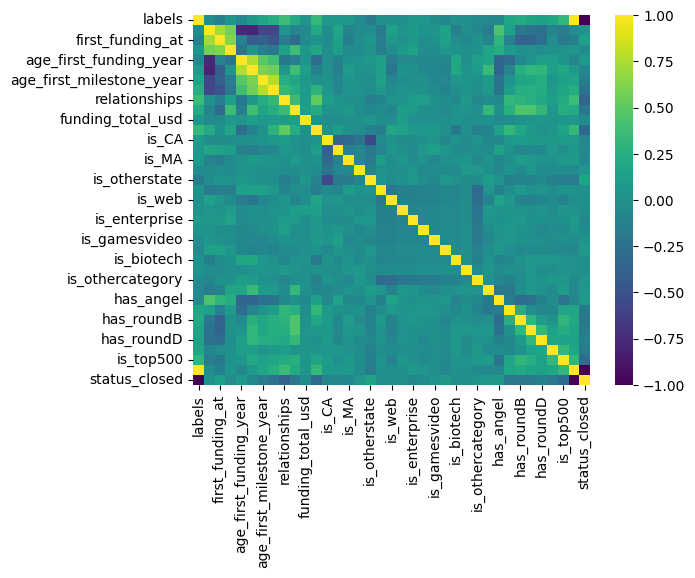

In [7]:
corr_matrix = df3.corr()
sns.heatmap(corr_matrix, annot=False, cmap="viridis")
plt.show()

In [8]:
x = df3.iloc[:,0:35]
y = df3['status_closed']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.2, random_state=27)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=.2, random_state=27)

In [ ]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [16]:
y_pred = model.predict(x_val)

#evaluating validation performance
val_mse = mean_squared_error(y_val, y_pred)
val_r2 = r2_score(y_val, y_pred)

print("mse: ", val_mse)
print("r_sq: ", val_r2)

mse:  8.00020888466326e-31
r_sq:  1.0


In [17]:
coef = model.coef_
feat_names = x.columns
for feature, coef in zip(feat_names, coef):
    print(f"{feature}: {coef}")

labels: -1.000000000000001
founded_at: 5.635690248663337e-12
first_funding_at: -3.642510321964849e-12
last_funding_at: 1.6682768692879736e-14
age_first_funding_year: 3.934728615334147e-12
age_last_funding_year: -2.3054883819339097e-14
age_first_milestone_year: 5.339768283593143e-17
age_last_milestone_year: 4.289049721384136e-17
relationships: 1.7197027239767637e-17
funding_rounds: -3.234074073603244e-16
funding_total_usd: -3.615724592730084e-17
milestones: -4.910591464710724e-17
is_CA: -1.157962493659672e-16
is_NY: -4.3694833863155065e-17
is_MA: 2.6776952403937207e-16
is_TX: -8.925109119148406e-17
is_otherstate: 2.1897029633941675e-16
is_software: -1.665867780595221e-16
is_web: 4.4410099150506066e-17
is_mobile: 1.996832783194125e-17
is_enterprise: 3.8429573453627145e-17
is_advertising: -3.942766940968857e-17
is_gamesvideo: 2.6914070777830596e-17
is_ecommerce: -1.1799971554146899e-17
is_biotech: 2.7299539699058468e-17
is_consulting: 6.238118652545752e-17
is_othercategory: -7.79314639724

In [19]:
n_samples = 40
Lambda = .001
X = np.random.rand(n_samples)
y = np.cos(1.5 * np.pi * X) + .5 * np.random.rand(n_samples)
X = X.reshape(-1, 1)

In [20]:
polymodel = PolynomialFeatures(degree = 3, include_bias = True)
data = polymodel.fit_transform(X)
model1 = LinearRegression()
model2 = Lasso(alpha=Lambda)

model1.fit(data, y)
model2.fit(data, y)

Lasso(alpha=0.001)

C:\Users\steve\AppData\Local\Temp\ipykernel_13280\748751233.py:10: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


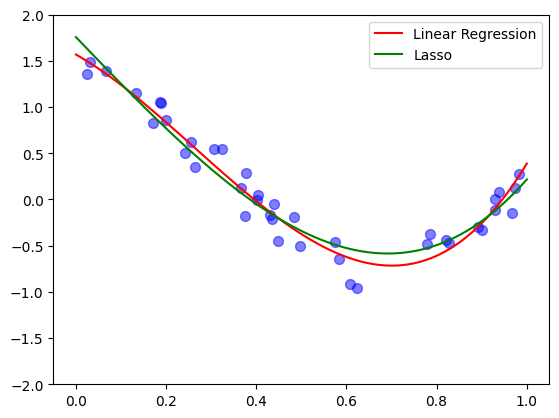

In [21]:
X_plot = np.linspace(0, 1, 100).reshape(-1, 1)
X_plot_poly = polymodel.transform(X_plot)
fig = plt.figure()

plt.scatter(X,y, c='b', s=50, alpha=.5)
plt.plot(X_plot,model1.predict(X_plot_poly),'-r', label='Linear Regression')
plt.plot(X_plot,model2.predict(X_plot_poly),'-g', label='Lasso')
plt.legend()
plt.ylim(-2,2)
fig.show()

In [23]:
y_pred1 = model1.predict(polymodel.transform(X))
y_pred2 = model2.predict(polymodel.transform(X))
#now its actually doing the predictions

loss1 = ((y_pred1-y)**2).mean() + Lambda*(np.abs(model1.coef_)).sum()
loss2 = ((y_pred2-y)**2).mean() + Lambda*(np.abs(model2.coef_)).sum()

loss1, loss2
print(f'Loss of Lin. Reg. Model with L1 Reg= {loss1:.3f} \nLoss of Lasso Model with L1 Reg = {loss2:.3f}')
print('Weights of Lin. Reg. Model=', model1.coef_[1:])
print('Weights of Lasso Model=', model2.coef_[1:])

Loss of Lin. Reg. Model with L1 Reg= 0.039 
Loss of Lasso Model with L1 Reg = 0.037
Weights of Lin. Reg. Model= [-2.75627415 -6.09406968  7.67007603]
Weights of Lasso Model= [-5.07926166 -0.          3.53866213]


In [25]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import torch
import torch.nn as nn
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
import pandas as pd
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")